# **Project - Convolutional Neural Networks: Street View Housing Number Digit Recognition**

# Marks: 30

Welcome to the project on classification using Convolutional Neural Networks. We will continue to work with the Street View Housing Numbers (SVHN) image dataset for this project.

--------------
### **Context:** 
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents. 

----------------
### **Objective:**
----------------

Build a CNN model that can identify the digits in the images.

-------------
### **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been done.

## **Mount the drive**
Let us start by mounting the drive and importing the necessary libraries.

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing libraries**

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU
from tensorflow.keras.utils import to_categorical

Let us check for the version of TensorFlow.

In [62]:
print(tf.__version__)

2.8.0


## **Load the dataset**
- Let us now load the dataset that is available as a .h5 file.
- Split the data into train and the test dataset

In [63]:
import h5py

# Open the file as read only
# User can make changes in the path as required
h5f = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5', 'r')

# Load the training and the test set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# Close this file
h5f.close()

Let's check the number of images in the training and testing data.

In [64]:
len(X_train), len(X_test)

(42000, 18000)

- There are 42,000 images in the training data and 18,000 images in the testing data. 

## **Visualizing images**
- Use X_train to visualize the first 10 images
- Use Y_train to print the first 10 labels

#### **Question 1: Complete the below code to visualize the first 10 images from the training data (1 Mark)**

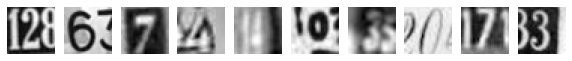

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [65]:
# visualizing the first 10 images in the dataset and their labels
plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray") # write the function to visualize images
    plt.axis('off')

plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

## **Data Preparation**

- Print the first image in the train image and figure out the shape of the images
- Reshape the train and the test dataset to make them fit the first convolutional operation that we will create later. Figure out the required shape
- Normalize the train and the test dataset by dividing by 255
- Print the new shapes of the train and the test set
- One-hot encode the target variable

In [66]:
# Shape of the images and the first image

print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [67]:
# Reshaping the dataset to flatten them. Remember that we always have to give a 4D array as input to CNNs

X_train = X_train.reshape(X_train.shape[0], 32,32,1)
X_test = X_test.reshape(X_test.shape[0], 32,32,1)

In [68]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train / 255.0
X_test = X_test / 255.0

In [69]:
# New shape 

print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


#### **Question 2: One-hot encode the labels in the target variable y_train and y_test (2 Marks)**

In [70]:
#Write the function and appropriate variable name to one-hot encode the output

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#test labels
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

- Notice that each entry of y_test is a one-hot encoded vector instead of a single label.

## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.

In [71]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture
 - First Convolutional layer with **16 filters and kernel size of 3x3**. Use the **'same' padding** and provide an **apt input shape**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes** and **softmax activation**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and accuracy metric**. Do not fit the model here, just return the compiled model
- Call the function and store the model in a new variable
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 32, verbose = 1, and 20 epochs**. Store the model building history to use later for visualization.

#### **Question 3: Build and train a CNN model as per the above mentioned architecture (10 Marks)**

In [72]:
#Importing losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

#Define the function
def cnn_model_1():
    model = Sequential() 
    #Add layers as per the architecture mentioned above in the same sequence

    # First Convolutional layer with 16 filters and kernel size of 3x3. Use the 'same' padding and provide an apt input shape
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same',  input_shape=(32, 32, 1)))
    
    # Add a LeakyRelu layer with the slope equal to 0.1
    model.add(LeakyReLU(0.1))

    # Second Convolutional layer with 32 filters and kernel size of 3x3 with 'same' padding
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same',))

    # Another LeakyRelu with the slope equal to 0.1
    model.add(LeakyReLU(0.1))

    # A max-pooling layer with a pool size of 2x2
    model.add(MaxPool2D(pool_size=(2, 2)))

    # Flatten the output from the previous layer
    model.add(Flatten())

    # Add a dense layer with 32 nodes
    model.add(Dense(32))

    # Add a LeakyRelu layer with slope equal to 0.1
    model.add(LeakyReLU(0.1))

    # Add the final output layer with nodes equal to the number of classes and softmax activation
    model.add(Dense(10, activation='softmax'))

    #declare adam optimizer with learning rate of 0.001 
    adam = optimizers.learning_rate = 0.001
    
    # Compile the model with the categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and accuracy metric
    model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [73]:
#Build the model
model_1 = cnn_model_1()

In [74]:
#Print the model summary
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 32, 32, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                      

In [75]:
# Fit the model
#Fit the model on the train data with a validation split of 0.2, batch size = 32, verbose = 1, and 20 epochs. Store the model building history to use later for visualization.
history_model_1 = model_1.fit(X_train, 
                    y_train,
                    validation_split=0.2,
                    batch_size = 32, 
                    epochs=20, 
                    verbose=1)

Epoch 1/20
1050/1050 [==============================] - 11s 10ms/step - loss: 1.1848 - accuracy: 0.6056 - val_loss: 0.6384 - val_accuracy: 0.8144
Epoch 2/20
1050/1050 [==============================] - 10s 10ms/step - loss: 0.5331 - accuracy: 0.8476 - val_loss: 0.5002 - val_accuracy: 0.8615
Epoch 3/20
1050/1050 [==============================] - 10s 10ms/step - loss: 0.4414 - accuracy: 0.8721 - val_loss: 0.4985 - val_accuracy: 0.8558
Epoch 4/20
1050/1050 [==============================] - 11s 11ms/step - loss: 0.3877 - accuracy: 0.8865 - val_loss: 0.4486 - val_accuracy: 0.8762
Epoch 5/20
1050/1050 [==============================] - 10s 9ms/step - loss: 0.3448 - accuracy: 0.8971 - val_loss: 0.4690 - val_accuracy: 0.8690
Epoch 6/20
1050/1050 [==============================] - 10s 10ms/step - loss: 0.3068 - accuracy: 0.9096 - val_loss: 0.4568 - val_accuracy: 0.8760
Epoch 7/20
1050/1050 [==============================] - 10s 10ms/step - loss: 0.2754 - accuracy: 0.9171 - val_loss: 0.4623 - 

### **Plotting the validation and training accuracies**

#### **Question 4: Write your observations on the below plot (2 Marks)**

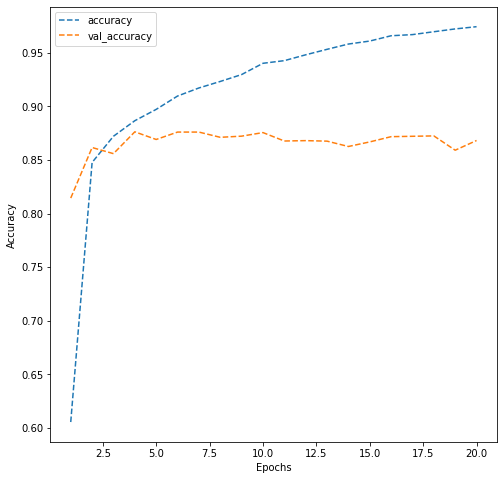

In [76]:
# plotting the accuracies

dict_hist = history_model_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

<Figure size 360x288 with 0 Axes>

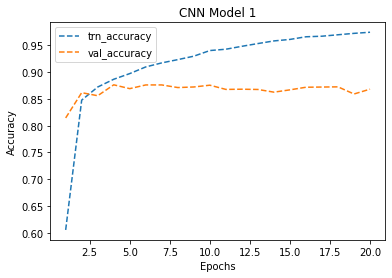

In [77]:
# plotting the accuracies (Portfolio Formatting, SMALLER IMAGE)

dict_hist = history_model_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (5,4))
plt.figure(facecolor = 'white')
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'trn_accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.title('CNN Model 1')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()



```
# This is formatted as code
```

**Observations:
*  The model is overfitting the data and needs improvement as the validation set is achieving an accuracy of only around 87% as compared to the training data accuracy of around 97%

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the keras backend. Also, let's fix the seed again after clearing the backend.

In [78]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [79]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture
 - First Convolutional layer with **16 filters and kernel size of 3x3**. Use the **'same' padding** and provide an **apt input shape**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and kernel size of 3x3 with 'same' padding** 
 - Add a **LeakyRelu layer with slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with slope equal to 0.1**
 - Add a **dropout layer with rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes** and **softmax activation**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and accuracy metric**. Do not fit the model here, just return the compiled model
- Call the function and store the model in a new variable
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and 30 epochs**. Store the model building history to use later for visualization.

#### **Question 5: Build and train the second CNN model as per the above mentioned architecture (10 Marks)**

In [80]:
#Define the function
def cnn_model_2():
    model = Sequential() 
    #Add layers as per the architecture mentioned above in the same sequence
    
    # 1 - First Convolutional layer with 16 filters and kernel size of 3x3. Use the 'same' padding and provide an apt input shape
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same',  input_shape=(32, 32, 1)))

    # Add a LeakyRelu layer with the slope equal to 0.1
    model.add(LeakyReLU(0.1))

    # 2 - Second Convolutional layer with 32 filters and kernel size of 3x3 with 'same' padding
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same',))
    
    # Another LeakyRelu with the slope equal to 0.1
    model.add(LeakyReLU(0.1))

    # Add a max-pooling layer with a pool size of 2x2
    model.add(MaxPool2D(pool_size=(2, 2)))

    # BatchNormalization layer
    model.add(BatchNormalization())

    # 3 - Third Convolutional layer with 32 filters and kernel size of 3x3 with 'same' padding
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same',))

    # Add a LeakyRelu layer with slope equal to 0.1
    model.add(LeakyReLU(0.1))

    # 4 - Fourth Convolutional layer 64 filters and kernel size of 3x3 with 'same' padding
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same',))

    # Add a LeakyRelu layer with slope equal to 0.1
    model.add(LeakyReLU(0.1))

    # Add a max-pooling layer with a pool size of 2x2
    model.add(MaxPool2D(pool_size=(2, 2)))

    # Add a BatchNormalization layer
    model.add(BatchNormalization())

    # Flatten the output from the previous layer
    model.add(Flatten())

    # Add a dense layer with 32 nodes
    model.add(Dense(32))

    # Add a LeakyRelu layer with slope equal to 0.1
    model.add(LeakyReLU(0.1))
    
    # Add a dropout layer with rate equal to 0.5
    model.add(Dropout(0.5))

    # Add the final output layer with nodes equal to the number of classes and softmax activation
    model.add(Dense(10, activation='softmax'))

    #declare adam optimizer with learning rate of 0.001 
    adam = optimizers.learning_rate = 0.001

    #compile the model
    model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [81]:
# Build the model
model_2 = cnn_model_2()

In [82]:
#Print the summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                          

In [83]:
# Fit the model on the train data with a validation split of 0.2, batch size = 128, verbose = 1, and 30 epochs
history_model_2 = model_2.fit(X_train, 
                    y_train,
                    validation_split=0.2,
                    batch_size = 128, 
                    epochs=30, 
                    verbose=1)

Epoch 1/30
263/263 [==============================] - 7s 23ms/step - loss: 1.4779 - accuracy: 0.4950 - val_loss: 2.6752 - val_accuracy: 0.1794
Epoch 2/30
263/263 [==============================] - 6s 21ms/step - loss: 0.6950 - accuracy: 0.7827 - val_loss: 0.6591 - val_accuracy: 0.8069
Epoch 3/30
263/263 [==============================] - 6s 21ms/step - loss: 0.5624 - accuracy: 0.8263 - val_loss: 0.4554 - val_accuracy: 0.8663
Epoch 4/30
263/263 [==============================] - 6s 21ms/step - loss: 0.5020 - accuracy: 0.8465 - val_loss: 0.4911 - val_accuracy: 0.8546
Epoch 5/30
263/263 [==============================] - 6s 21ms/step - loss: 0.4544 - accuracy: 0.8625 - val_loss: 0.3853 - val_accuracy: 0.8894
Epoch 6/30
263/263 [==============================] - 6s 22ms/step - loss: 0.4135 - accuracy: 0.8737 - val_loss: 0.4264 - val_accuracy: 0.8771
Epoch 7/30
263/263 [==============================] - 6s 22ms/step - loss: 0.3806 - accuracy: 0.8836 - val_loss: 0.4256 - val_accuracy: 0.8823

### **Plotting the validation and training accuracies**

#### **Question 6: Write your observations on the below plot (2 Marks)**

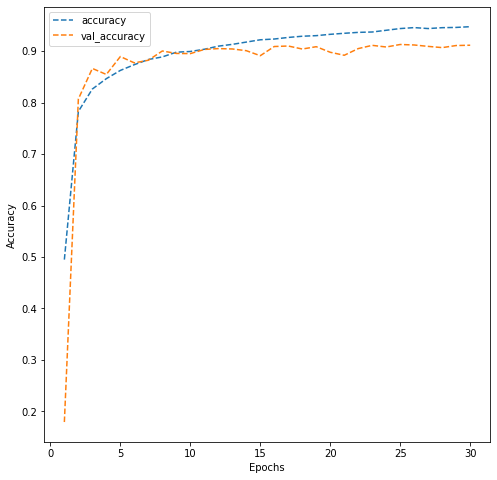

In [84]:
# plotting the accuracies

dict_hist = history_model_2.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

<Figure size 360x288 with 0 Axes>

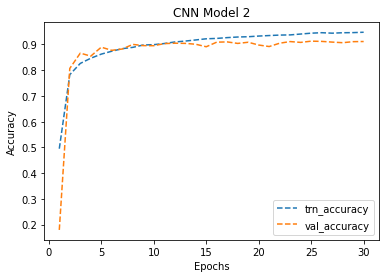

In [85]:
# plotting the accuracies (Portfolio Formatting - SMALLER IMAGE)

dict_hist = history_model_2.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (5,4))
plt.figure(facecolor = 'white')
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'trn_accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.title('CNN Model 2')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:
* This model performs better on the validation set, increasing the accuracy from 87% to 90%
* It is also less accurately fitting the training data (92% here vs. 97% previously), but this is at the expense of reducing overfitting which is evidenced by the fact that the accuracy for both the training and validation sets are closer.

## **Predictions on the test data**

- Make predictions on the test set using the second model
- Print the obtained results using classification report and the confusion matrix
- Final observations from the obtained results

#### **Question 7: Make predictions on the test data using the second model (1 Mark)**

In [86]:
#Make prediction on the test data using model_2 
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis=-1)

**Note:** Earlier, we noticed that each entry of the test data is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [87]:
#Converting each entry to single label from one-hot encoded vector
y_test = np.argmax(y_test, axis=-1)

#### **Question 8: Write your final observations on the performance of the model on the test data (2 Marks)**

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1814
           1       0.93      0.89      0.91      1828
           2       0.94      0.92      0.93      1803
           3       0.93      0.86      0.89      1719
           4       0.93      0.92      0.92      1812
           5       0.90      0.92      0.91      1768
           6       0.89      0.91      0.90      1832
           7       0.94      0.93      0.93      1808
           8       0.85      0.92      0.88      1812
           9       0.89      0.91      0.90      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



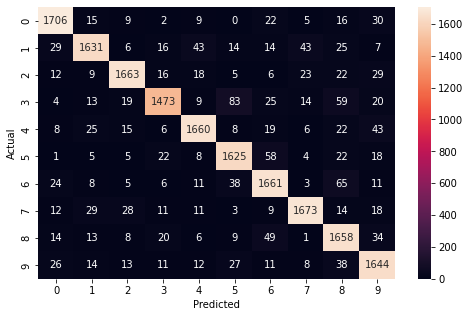

In [88]:
#importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report
print(classification_report(y_test, test_pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<Figure size 360x288 with 0 Axes>

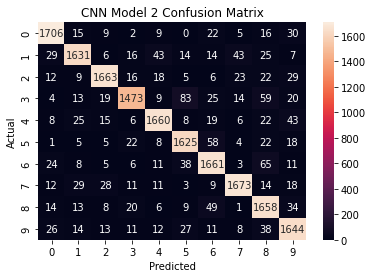

In [89]:
#For Portfolio....SMALLER IMAGE

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(5,4))
plt.figure(facecolor = 'white')
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.title('CNN Model 2 Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [90]:
#STUDENT ADDED - For Portfolio....Creating a Data Frame with Classification Report Results

#Printing the classification report
cr_cnn2 = pd.DataFrame(classification_report(y_test, test_pred, output_dict=True)).T
cr_cnn2

,precision,recall,f1-score,support
0,0.929194,0.940463,0.934795,1814.000000
1,0.925653,0.892232,0.908635,1828.000000
2,0.939018,0.922352,0.930610,1803.000000
3,0.930512,0.856894,0.892187,1719.000000
4,0.928931,0.916115,0.922478,1812.000000
5,0.896799,0.919118,0.907821,1768.000000
6,0.886339,0.906659,0.896384,1832.000000
7,0.939888,0.925332,0.932553,1808.000000
8,0.854199,0.915011,0.883560,1812.000000
9,0.886731,0.911308,0.898852,1804.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 0, 'Digit')

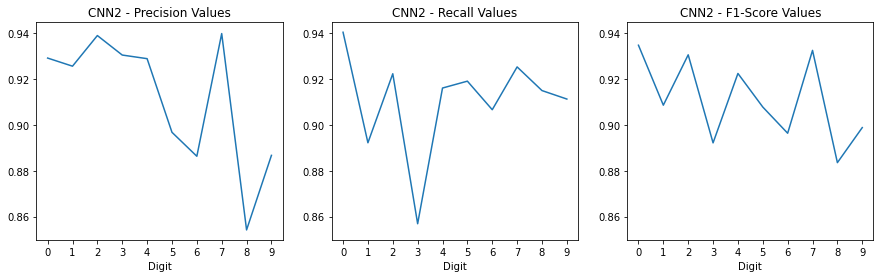

In [101]:
#STUDENT ADDED - For Portfolio, creating plots of Classification Report Scores
plt.figure(figsize=(15,4)).patch.set_facecolor('white')

plt.subplot(1,3,1, facecolor = 'white', frameon=True)
plt.plot(cr_cnn2.index[0:10], cr_cnn2.precision.iloc[0:10])
plt.title('CNN2 - Precision Values')
plt.xlabel('Digit')

plt.subplot(1,3,2, facecolor = 'white', sharey = plt.subplot(1,3,1, facecolor = 'white', frameon=True))
plt.plot(cr_cnn2.index[0:10], cr_cnn2.recall.iloc[0:10])
plt.title('CNN2 - Recall Values')
plt.xlabel('Digit')

plt.subplot(1,3,3, facecolor = 'white', sharey = plt.subplot(1,3,1, facecolor = 'white', frameon=True))
plt.plot(cr_cnn2.index[0:10], cr_cnn2['f1-score'].iloc[0:10])
plt.title('CNN2 - F1-Score Values')
plt.xlabel('Digit')

#### Observations (Rewritten based on "Student-Added" sections above):
It should be noted that in the course of multiple model runs, the results tend to change noticeably.  This is not explored here, and it should be understood that the observations described below are specific to the last completed run.
* Drawing conclusions from the confusion matrix is difficult as there are different numbers of images for each digit.  This means that when comparing the different types of errors, they would need to first be normalized to draw accurate conclusions.  For a high-level review of this model, it's most useful to examine the precision, recall, and F1-score values from the classification report.  In this context, recall values can be best interpreted as the percentage of a particular category of image that was correctly identified. The precision values qualitatively represent how carefully the model classifies each image and quantitatively represents the percentage of predictions for a particular digit (category) that are correct.  In some cases, it can be seen that the digit categories with relatively low recalls have high precisions, meaning that the model correctly classifies a smaller percentage of that type of image, but does so with relatively fewer false positives.  In such a case a classification for such a number has a higher chance of being correct.
* The F1-score is hybridized metric which considers trade-off between the precision and recall, and is the best metric to examine for this model.  The F1-score would produce a lower value for digits which are identified at a high percentage but for which the predictions for that category are correct smaller percentage of the time.  Above, the number 3 is correctly identified only about 86% of the time, however, when the model predicts that an image is the number 3, it is correct about 93% of the time.  Thus, the F1 score for the number 3 is in-between these values at 89% in consideration of the implications of both precision and recall.
* From the prior training and validation accuracies, this model could be further refined to reduce the overfitting.  Perhaps adding another dropout earlier in the process would be helpful in reducing overfitting, though other techniques can be employed.
* The test data accuracy for the second CNN model of 89.8% was very close to that predicted by its validation data accuracy of 89.7%.
